In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv(r'C:\Users\Home\Downloads\customer_churn_telecom.csv')

In [4]:
df

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0                 27             Basic         Monthly          598   
1                 13          Standard         Monthly          584   
2                 29           Premium          Annual          757   
3                 17           Premium       Quarterly          232   
4                  2          Standard          Annual          533   
...              ...               ...             ...          ...   
64369             21             Basic       Quarterly          947   
64370             22          Standard          Annual          923   
64371             30           Premium         Monthly          327   
64372             22          Standard         Monthly          540   
64373             25          Standard         Monthly          696   

       Last Interaction  Churn  
0                     9      1  
1                    20      0  
2                    21      0  
3                    18      0  
4                    18      0  
...                 ...    ...  
64369                14      1  
64370                 9      1  
64371                20      1  
64372                13      1  
64373                22      1  

[64374 rows x 12 columns]

In [7]:
df.head(10)

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   
5           6   30    Male      41               14             10   
6           7   47  Female      37               15              9   
7           8   54  Female      36               11              0   
8           9   36    Male      20                5             10   
9          10   65    Male       8                4              2   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   
5             10           Premium         Monthly          500   
6             28             Basic       Quarterly          574   
7             18          Standard         Monthly          323   
8              8             Basic         Monthly          687   
9             23             Basic          Annual          995   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
5                29      0  
6                14      1  
7                16      0  
8                 8      0  
9                10      0

In [9]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [13]:
df.describe().round(2)

CustomerID       Age    Tenure  Usage Frequency  Support Calls  \
count    64374.00  64374.00  64374.00         64374.00       64374.00   
mean     32187.50     41.97     31.99            15.08           5.40   
std      18583.32     13.92     17.10             8.82           3.11   
min          1.00     18.00      1.00             1.00           0.00   
25%      16094.25     30.00     18.00             7.00           3.00   
50%      32187.50     42.00     33.00            15.00           6.00   
75%      48280.75     54.00     47.00            23.00           8.00   
max      64374.00     65.00     60.00            30.00          10.00   

       Payment Delay  Total Spend  Last Interaction     Churn  
count       64374.00     64374.00          64374.00  64374.00  
mean           17.13       541.02             15.50      0.47  
std             8.85       260.87              8.64      0.50  
min             0.00       100.00              1.00      0.00  
25%            10.00       313.00              8.00      0.00  
50%            19.00       534.00             15.00      0.00  
75%            25.00       768.00             23.00      1.00  
max            30.00      1000.00             30.00      1.00

In [15]:
# Generate the Sweetviz report
#import sweetviz as sv
#report = sv.analyze(df)

# Show the report
#report.show_html('Customer_Churn_Report.html')

In [17]:
# Remove unnecessary columns
df = df.drop(columns=['CustomerID'])

In [19]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [21]:
# Define categorical and numerical columns
categorical_cols = ['Gender']
ordinal_col = ['Subscription Type','Contract Length']
numerical_cols = ['Age','Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend',
       'Last Interaction']

In [23]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [25]:
df['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [27]:
# Apply Ordinal Encoding for 'Card Type'
ordinal_encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium'],['Monthly', 'Quarterly','Annual']])
df[ordinal_col] = ordinal_encoder.fit_transform(df[ordinal_col])

In [29]:
df

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22  Female      25               14              4             27   
1       41  Female      28               28              7             13   
2       47    Male      27               10              2             29   
3       35    Male       9               12              5             17   
4       53  Female      58               24              9              2   
...    ...     ...     ...              ...            ...            ...   
64369   45  Female      33               12              6             21   
64370   37    Male       6                1              5             22   
64371   25    Male      39               14              8             30   
64372   50  Female      18               19              7             22   
64373   52  Female      45               15              9             25   

       Subscription Type  Contract Length  Total Spend  Last Interaction  \
0                    0.0              0.0          598                 9   
1                    1.0              0.0          584                20   
2                    2.0              2.0          757                21   
3                    2.0              1.0          232                18   
4                    1.0              2.0          533                18   
...                  ...              ...          ...               ...   
64369                0.0              1.0          947                14   
64370                1.0              2.0          923                 9   
64371                2.0              0.0          327                20   
64372                1.0              0.0          540                13   
64373                1.0              0.0          696                22   

       Churn  
0          1  
1          0  
2          0  
3          0  
4          0  
...      ...  
64369      1  
64370      1  
64371      1  
64372      1  
64373      1  

[64374 rows x 11 columns]

In [31]:
df['Subscription Type'].value_counts()

Subscription Type
1.0    21502
0.0    21451
2.0    21421
Name: count, dtype: int64

In [33]:
df['Contract Length'].value_counts()

Contract Length
0.0    22130
2.0    21410
1.0    20834
Name: count, dtype: int64

In [35]:
# Apply One-Hot Encoding for 'Geography' and 'Gender'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
df

Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22      25               14              4             27   
1       41      28               28              7             13   
2       47      27               10              2             29   
3       35       9               12              5             17   
4       53      58               24              9              2   
...    ...     ...              ...            ...            ...   
64369   45      33               12              6             21   
64370   37       6                1              5             22   
64371   25      39               14              8             30   
64372   50      18               19              7             22   
64373   52      45               15              9             25   

       Subscription Type  Contract Length  Total Spend  Last Interaction  \
0                    0.0              0.0          598                 9   
1                    1.0              0.0          584                20   
2                    2.0              2.0          757                21   
3                    2.0              1.0          232                18   
4                    1.0              2.0          533                18   
...                  ...              ...          ...               ...   
64369                0.0              1.0          947                14   
64370                1.0              2.0          923                 9   
64371                2.0              0.0          327                20   
64372                1.0              0.0          540                13   
64373                1.0              0.0          696                22   

       Churn  Gender_Male  
0          1          0.0  
1          0          0.0  
2          0          1.0  
3          0          1.0  
4          0          0.0  
...      ...          ...  
64369      1          0.0  
64370      1          1.0  
64371      1          1.0  
64372      1          0.0  
64373      1          0.0  

[64374 rows x 11 columns]

In [39]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [41]:
##Outlier removal
df.describe().round(2)

Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
count  64374.00  64374.00         64374.00       64374.00       64374.00   
mean      -0.00     -0.00             0.00          -0.00          -0.00   
std        1.00      1.00             1.00           1.00           1.00   
min       -1.72     -1.81            -1.60          -1.73          -1.94   
25%       -0.86     -0.82            -0.92          -0.77          -0.81   
50%        0.00      0.06            -0.01           0.19           0.21   
75%        0.86      0.88             0.90           0.83           0.89   
max        1.65      1.64             1.69           1.48           1.45   

       Subscription Type  Contract Length  Total Spend  Last Interaction  \
count           64374.00         64374.00     64374.00          64374.00   
mean                1.00             0.99        -0.00              0.00   
std                 0.82             0.82         1.00              1.00   
min                 0.00             0.00        -1.69             -1.68   
25%                 0.00             0.00        -0.87             -0.87   
50%                 1.00             1.00        -0.03             -0.06   
75%                 2.00             2.00         0.87              0.87   
max                 2.00             2.00         1.76              1.68   

          Churn  Gender_Male  
count  64374.00     64374.00  
mean       0.47         0.47  
std        0.50         0.50  
min        0.00         0.00  
25%        0.00         0.00  
50%        0.00         0.00  
75%        1.00         1.00  
max        1.00         1.00

In [43]:
#import numpy as np
# Cap z-scores at 3 for 'Age' and 'NumOfProducts'
#z_age_capped = np.clip(df['Age'], -3, 3)
#z_numofproducts_capped = np.clip(df['NumOfProducts'], -3, 3)

#df['Age'] = z_age_capped
#df['NumOfProducts'] = z_numofproducts_capped

In [45]:
df.describe().round(2)

Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
count  64374.00  64374.00         64374.00       64374.00       64374.00   
mean      -0.00     -0.00             0.00          -0.00          -0.00   
std        1.00      1.00             1.00           1.00           1.00   
min       -1.72     -1.81            -1.60          -1.73          -1.94   
25%       -0.86     -0.82            -0.92          -0.77          -0.81   
50%        0.00      0.06            -0.01           0.19           0.21   
75%        0.86      0.88             0.90           0.83           0.89   
max        1.65      1.64             1.69           1.48           1.45   

       Subscription Type  Contract Length  Total Spend  Last Interaction  \
count           64374.00         64374.00     64374.00          64374.00   
mean                1.00             0.99        -0.00              0.00   
std                 0.82             0.82         1.00              1.00   
min                 0.00             0.00        -1.69             -1.68   
25%                 0.00             0.00        -0.87             -0.87   
50%                 1.00             1.00        -0.03             -0.06   
75%                 2.00             2.00         0.87              0.87   
max                 2.00             2.00         1.76              1.68   

          Churn  Gender_Male  
count  64374.00     64374.00  
mean       0.47         0.47  
std        0.50         0.50  
min        0.00         0.00  
25%        0.00         0.00  
50%        0.00         0.00  
75%        1.00         1.00  
max        1.00         1.00

In [47]:
###Step 3:Model Building  Logistics Regression
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
## Logistics
model=LogisticRegression()
model.fit(X_train, y_train)
##step 4:Model Prediction

# Make predictions
y_pred= model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     10134
           1       0.81      0.83      0.82      9179

    accuracy                           0.83     19313
   macro avg       0.83      0.83      0.83     19313
weighted avg       0.83      0.83      0.83     19313



In [51]:
# K-Nearest Neighbors (KNN)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# Make predictions
y_pred= model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10134
           1       0.87      0.93      0.90      9179

    accuracy                           0.90     19313
   macro avg       0.90      0.90      0.90     19313
weighted avg       0.90      0.90      0.90     19313



In [55]:
# Support Vector Machine (SVM)
model = SVC(kernel='linear') 
model.fit(X_train, y_train)
# Make predictions
y_pred= model.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     10134
           1       0.81      0.83      0.82      9179

    accuracy                           0.83     19313
   macro avg       0.83      0.83      0.83     19313
weighted avg       0.83      0.83      0.83     19313



In [56]:
# Naive Bayes
model =GaussianNB()
model.fit(X_train, y_train)
# Make predictions
y_pred= model.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10134
           1       0.82      0.87      0.84      9179

    accuracy                           0.84     19313
   macro avg       0.84      0.85      0.84     19313
weighted avg       0.85      0.84      0.84     19313



In [57]:
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred= model.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)
y_pred_gini = model_gini.predict(X_test)

# Create and train the Decision Tree model using Entropy
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)

# Print classification reports
print("Classification Report using Gini Impurity:")
print(classification_report(y_test, y_pred_gini))
print("Classification Report using Entropy:")
print(classification_report(y_test, y_pred_entropy))

Classification Report using Gini Impurity:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313

Classification Report using Entropy:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10134
           1       1.00      1.00      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



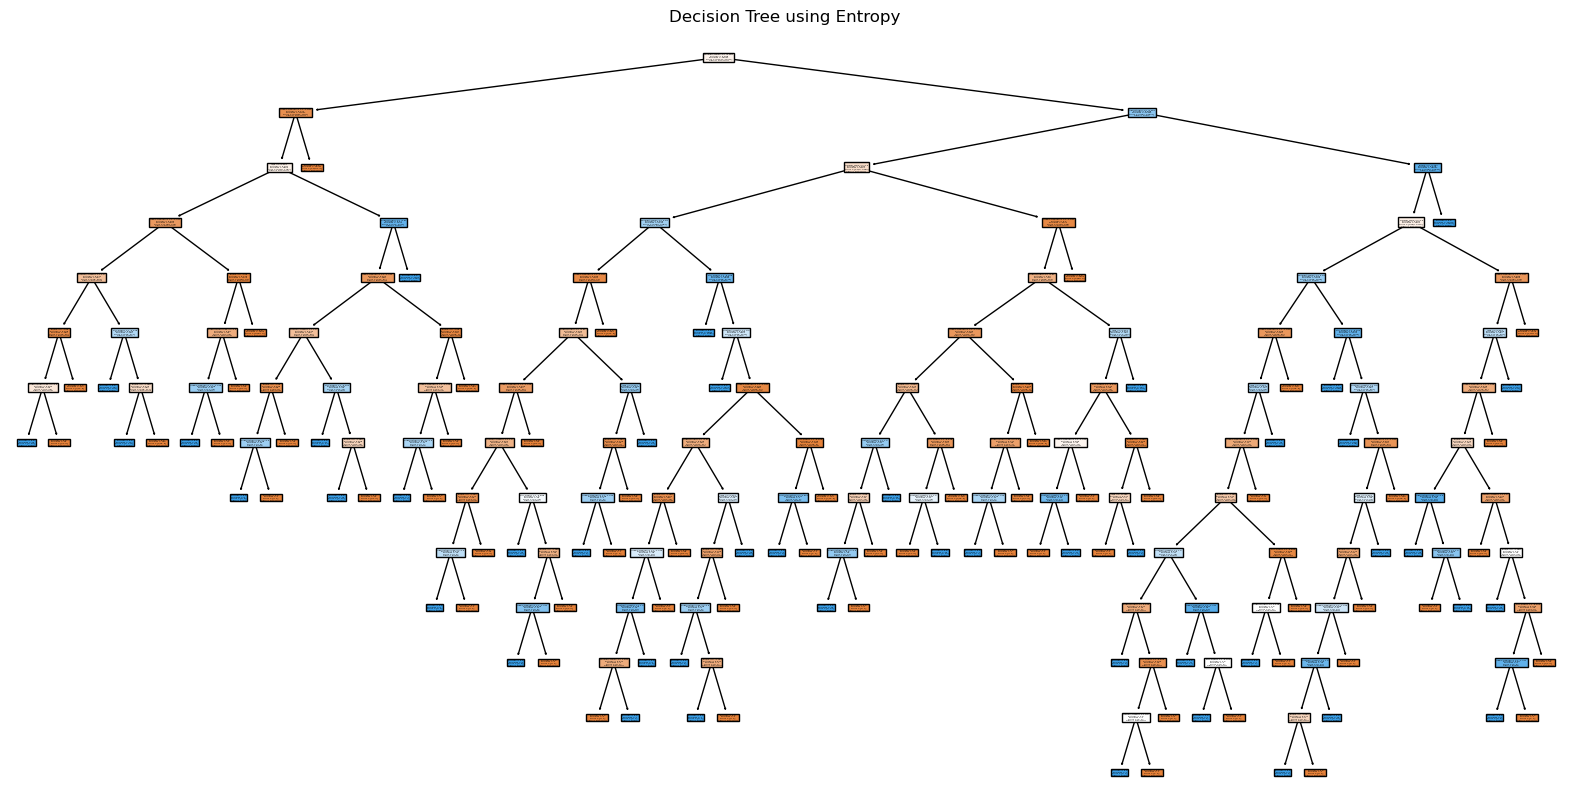

In [59]:
# Plot the Decision Tree using Gini
plt.figure(figsize=(300,100))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree using Gini Impurity")
plt.show()

# Plot the Decision Tree using Entropy
plt.figure(figsize=(20,10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree using Entropy")
plt.show()